In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
boston_data = pd.read_csv("Boston1.csv")
boston_data.columns = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","BLACK","LSTAT","MEDV"]

In [3]:
boston_data.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'BLACK', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
boston_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [6]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
boston_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [8]:
boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot: >

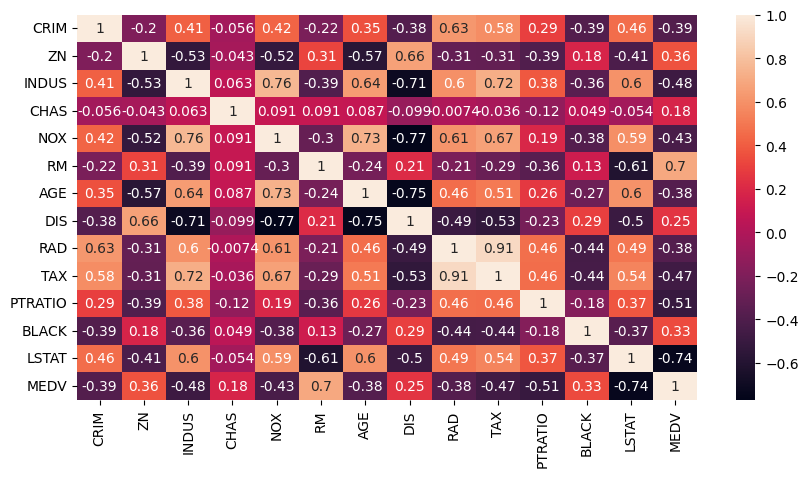

In [9]:
plt.figure(figsize = (10,5))
sns.heatmap(boston_data.corr(),annot=True)

In [10]:
X = boston_data.drop('MEDV', axis=1)
y = boston_data.MEDV

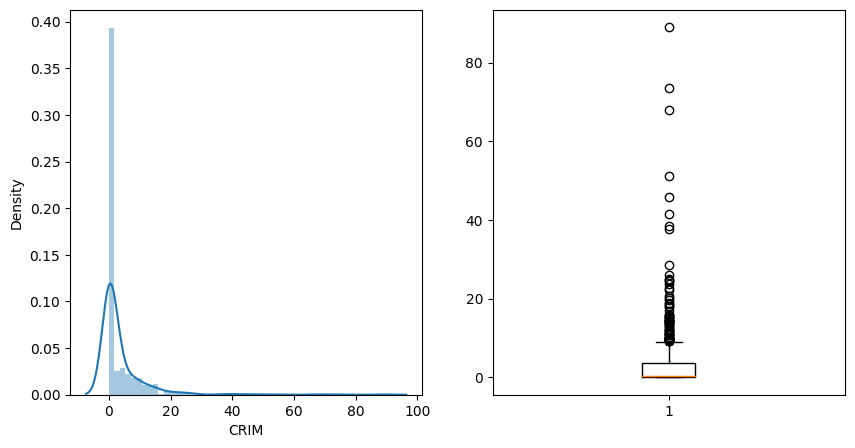

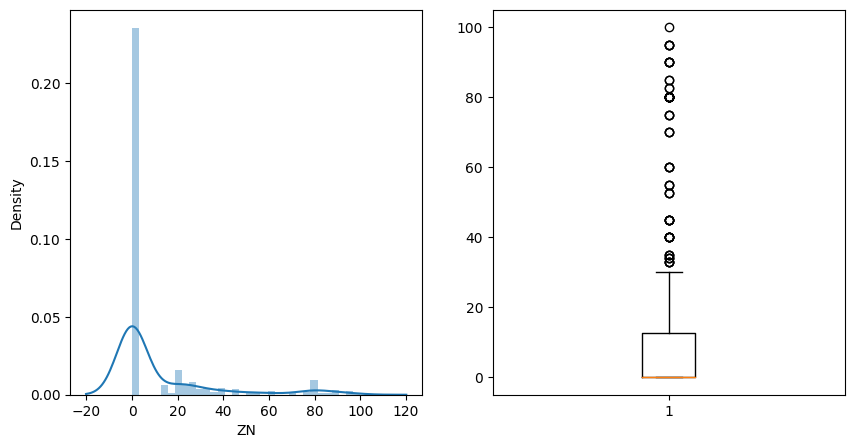

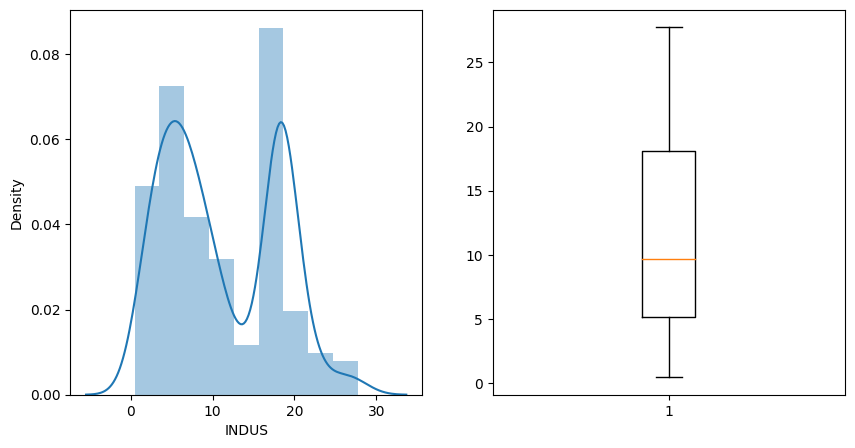

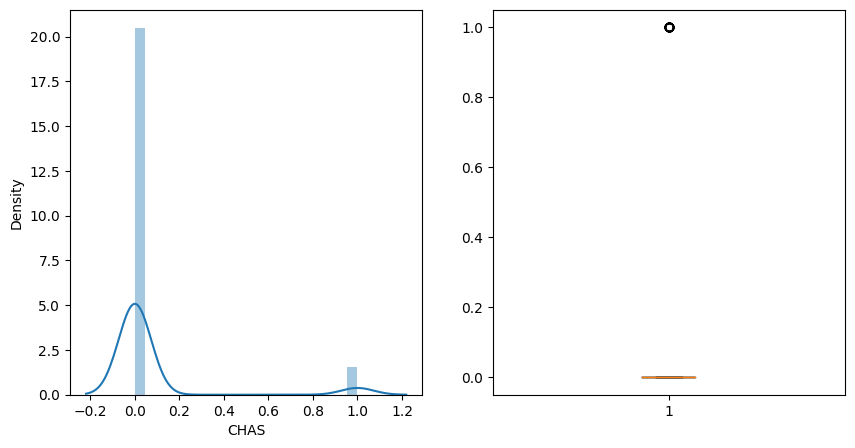

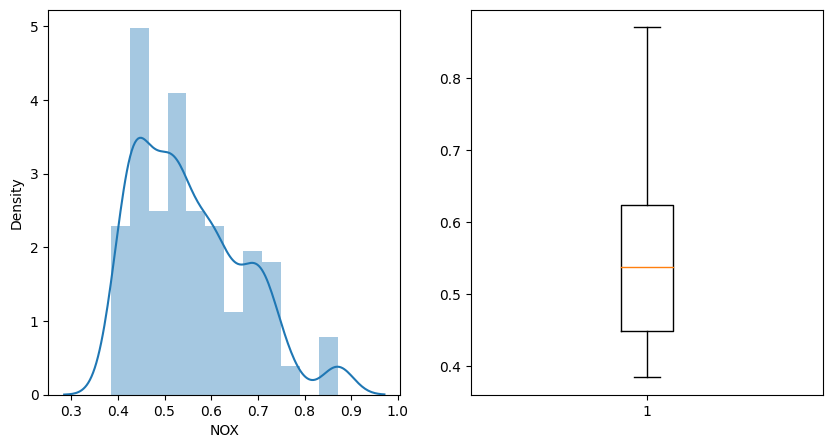

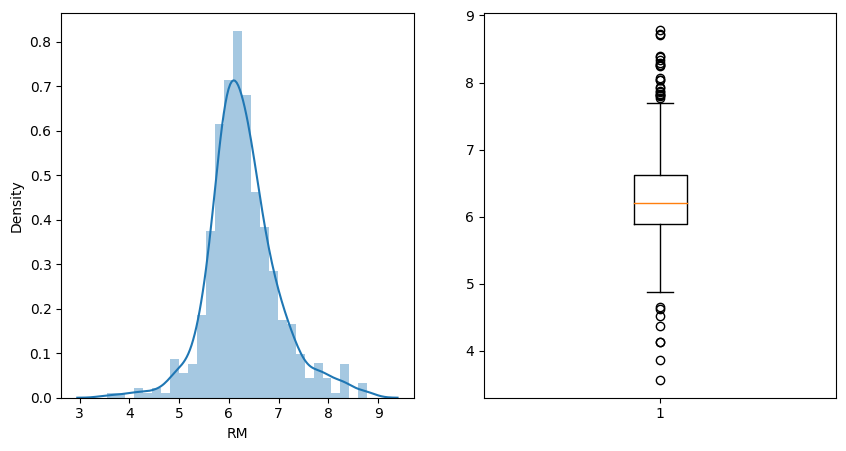

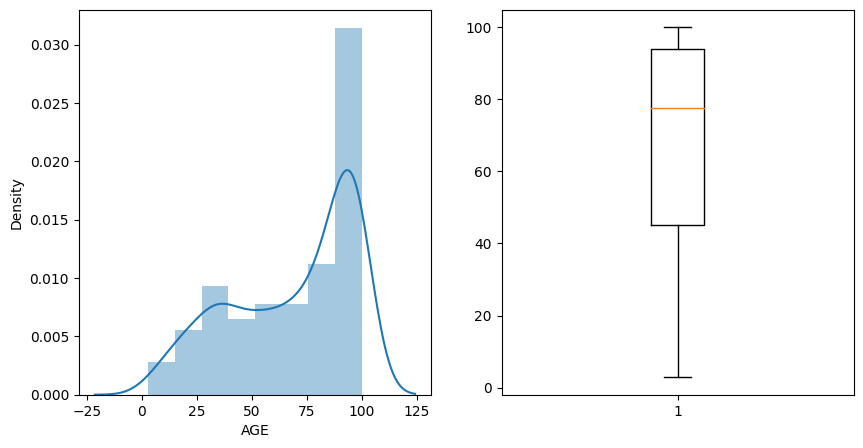

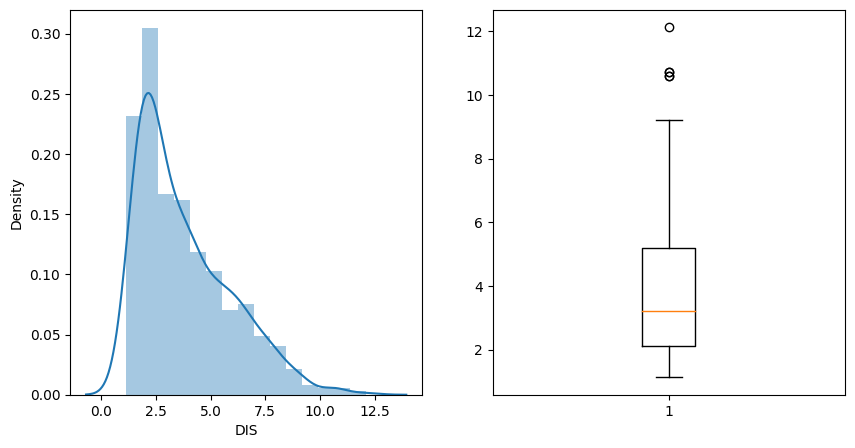

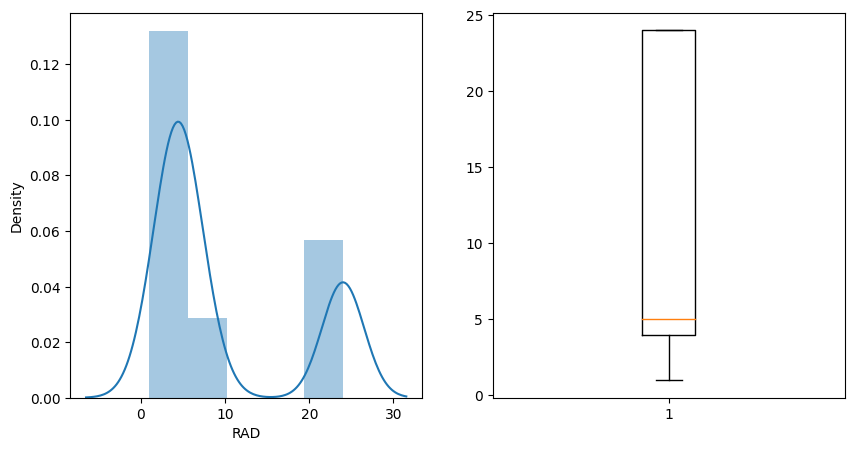

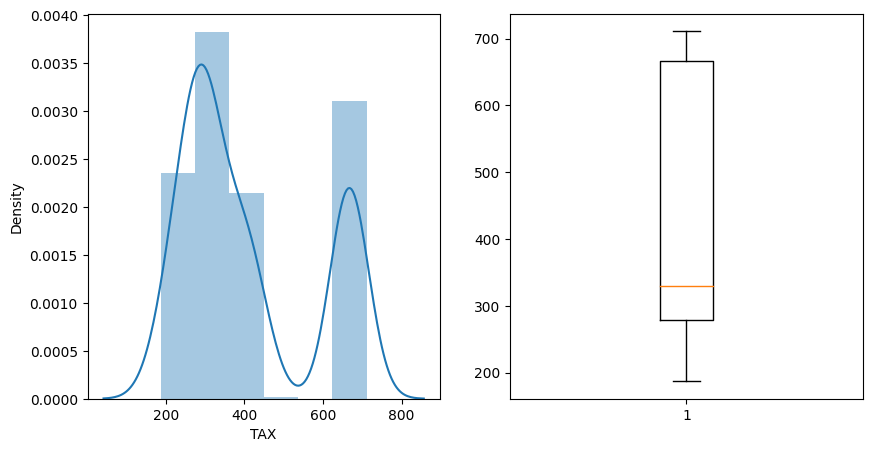

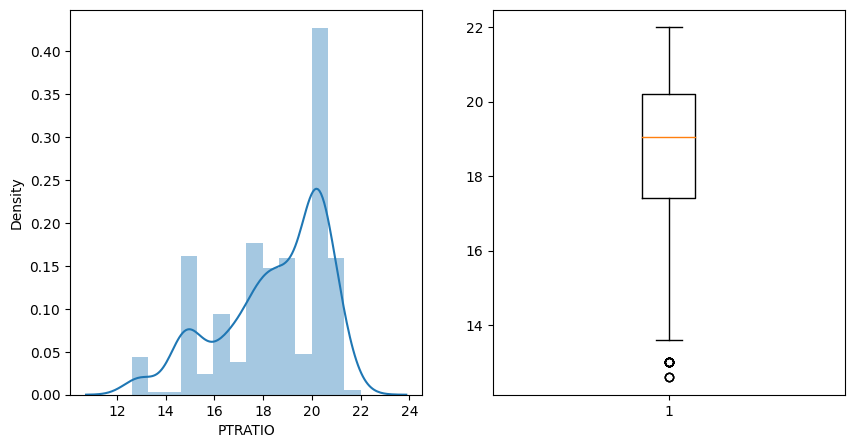

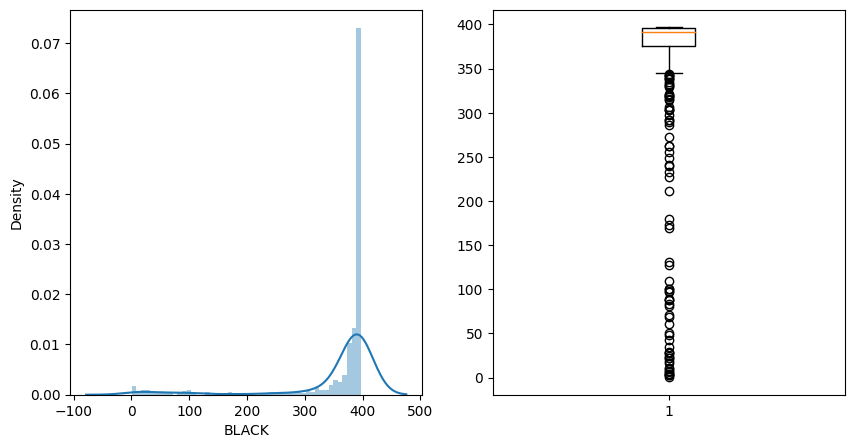

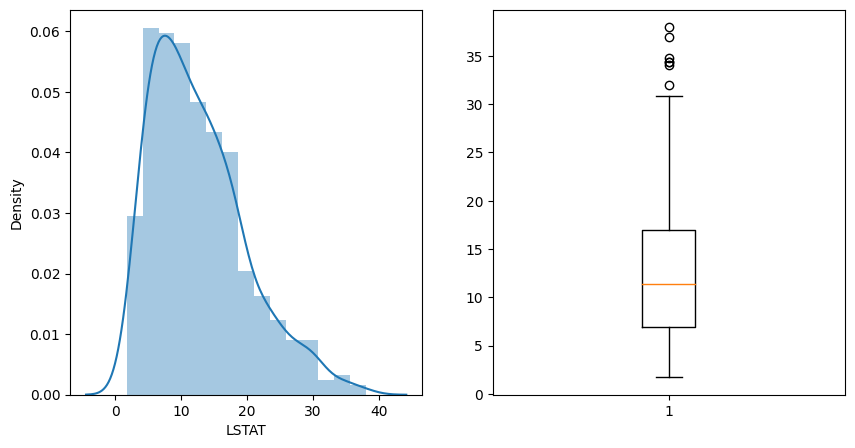

In [11]:
for i,v in enumerate(X.columns.to_list()):
    fig, ax = plt.subplots(1,2,figsize=(10,5))
    sns.distplot(boston_data[v],ax=ax[0])
    ax[1].boxplot(boston_data[v])
    plt.show()


### Hyperparameter tunning for Lasso regressor 

In [12]:
alphas = np.geomspace(0.01, 6.0, 25)
alphas

array([0.01      , 0.01305438, 0.01704169, 0.02224687, 0.02904191,
       0.03791242, 0.04949232, 0.06460916, 0.08434327, 0.11010492,
       0.14373516, 0.18763736, 0.24494897, 0.31976574, 0.41743439,
       0.54493479, 0.71137866, 0.92866085, 1.2123093 , 1.58259482,
       2.06597966, 2.69700868, 3.52077804, 4.59615798, 6.        ])

In [17]:
scores = []
coefs = []
kf = KFold(shuffle = True, random_state = 1000, n_splits = 3)
s = StandardScaler()
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

list(zip(alphas,scores))

[(0.01, 0.7095284952867051),
 (0.013054381553305822, 0.7089600061914016),
 (0.01704168777392914, 0.7080719357446628),
 (0.022246869451317788, 0.7066719804986273),
 (0.029041912218408572, 0.7044170946660665),
 (0.03791242031367198, 0.7018769557883081),
 (0.04949232003839766, 0.6994931302230342),
 (0.06460916297395665, 0.6981434640108286),
 (0.0843432665301749, 0.6975775945843967),
 (0.11010491827370722, 0.6975318072019439),
 (0.14373516140405285, 0.6971545500581686),
 (0.18763736395945022, 0.6970029247290812),
 (0.24494897427831788, 0.6962415504620649),
 (0.31976573713200546, 0.6944700190646911),
 (0.41743439401952903, 0.6911572025694472),
 (0.5449347853003936, 0.6855396829212166),
 (0.7113786608980127, 0.6759416563080637),
 (0.9286608468242413, 0.660010035316261),
 (1.2123093028059746, 0.6393114373733488),
 (1.5825948199451345, 0.6185298490761015),
 (2.0659796623849123, 0.6025559251327974),
 (2.69700867941426, 0.5844307565200105),
 (3.5207780353651192, 0.5616136446676647),
 (4.59615798

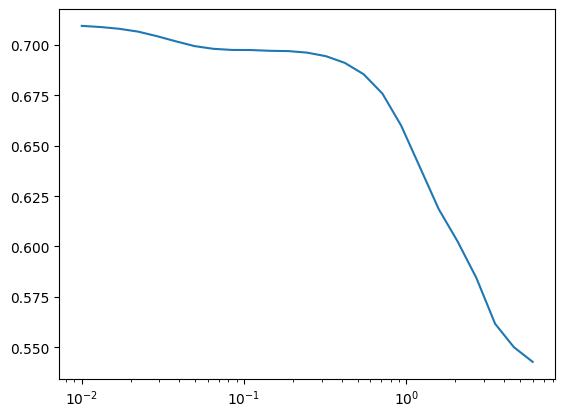

In [18]:
plt.semilogx(alphas, scores);

### For Alpha=0.01 Lasso regression giving me better R2 score

###  R2 score without scaling the data

In [19]:
kf = KFold(shuffle = True, random_state = 1000, n_splits = 3)

ls = Lasso(alpha=0.01)

estimator = Pipeline([("Lasso",ls)])

Predict = cross_val_predict(estimator, X, y, cv = kf)

r2_score(y,Predict)*100

70.95284952867051

### R2 score after scaling the data

In [20]:
kf = KFold(shuffle = True, random_state = 1000, n_splits = 3)

scale = StandardScaler()
ls = Lasso(alpha=0.01)

estimator = Pipeline([("scaling",scale),("Lasso",ls)])

Predict = cross_val_predict(estimator, X, y, cv = kf)

r2_score(y,Predict)*100

71.03183079150679

#### Note: we can see that scaling the data won't change the R2 score it just increse the model performance.

## Try to increase the R2 score further by nornallize the target variable

In [21]:
from scipy.stats.mstats import normaltest 
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696098e-20)

### Log transformation

In [22]:
log_medv = np.log(boston_data.MEDV)

<AxesSubplot: >

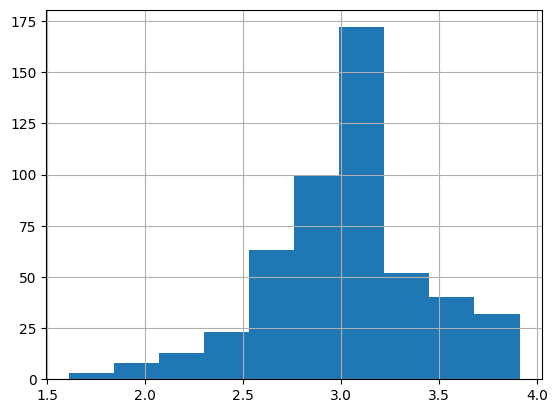

In [23]:
log_medv.hist()

### Square root Transformation


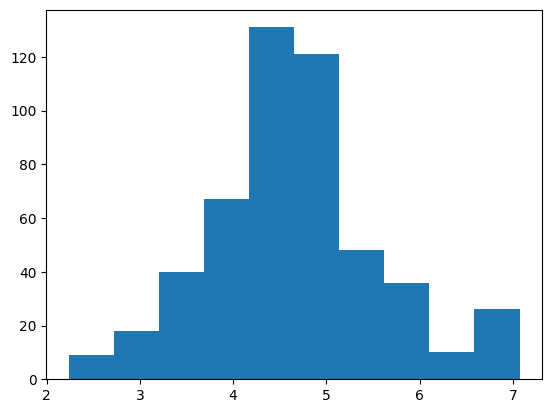

In [24]:
sqrt_medv = np.sqrt(y)
plt.hist(sqrt_medv);

In [25]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

### boxcox transformation

In [26]:
from scipy.stats import boxcox

In [27]:
bc_result = boxcox(y)
boxcox_medv = bc_result[0]
lam = bc_result[1]

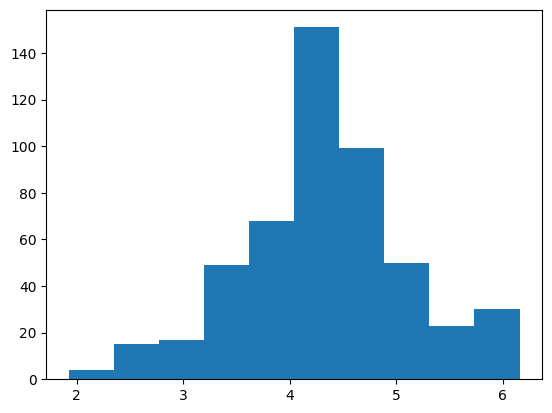

In [28]:
plt.hist(boxcox_medv);

In [29]:
print("p_value is",normaltest(boxcox_medv)[1]*100)

p_value is 10.46886692817602


In [30]:
y_normal = boxcox_medv

## R2 score after scaling and Normalize the data

In [31]:
kf = KFold(shuffle = True, random_state = 1000, n_splits = 3)

In [32]:
scale = StandardScaler()
ls = Lasso(alpha=0.01)

In [33]:
estimator = Pipeline([("scaling",scale),("Lasso",ls)])

In [34]:
Predict = cross_val_predict(estimator, X, y_normal, cv = kf)

In [51]:
Predict[-10:]

array([3.83263367, 4.11061034, 4.24797319, 4.08228906, 4.1795007 ,
       4.51050598, 4.40269226, 4.88551788, 4.73567308, 4.40136481])

In [36]:
r2_score(y_normal,Predict)*100

75.57779840512453

### To obtain orginal distribution aften we apply inverse boxcox

In [37]:
from scipy.special import inv_boxcox

In [38]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

## Try to increase the R2 score further by applying polynomial transformation

In [49]:
score = {}
kf = KFold(shuffle = True, random_state = 1000, n_splits = 3)

for degree in range(2,9):
    scale = StandardScaler()
    pl = PolynomialFeatures(degree=degree, include_bias=False)
    ls = Lasso(alpha=0.01)

    estimator = Pipeline([("polynomial",pl),("scaling",scale),("Lasso",ls)])

    Predict = cross_val_predict(estimator, X, y_normal, cv = kf)

    score[degree] = r2_score(y_normal,Predict)*100
    
score

{2: 80.70122006039115,
 3: 82.22434649794334,
 4: 82.61652457008555,
 5: 82.4464038486507,
 6: 82.4078336729722,
 7: 82.46271108519358,
 8: 82.59915473448697}

In [53]:
kf = KFold(shuffle = True, random_state = 1000, n_splits = 3)

scale = StandardScaler()
pl = PolynomialFeatures(degree=3, include_bias=False)
ls = Lasso(alpha=0.01)

estimator = Pipeline([("polynomial",pl),("scaling",scale),("Lasso",ls)])

Predict = cross_val_predict(estimator, X, y_normal, cv = kf)

r2_score(y_normal,Predict)*100

82.22434649794334

### 
📫 How to reach me: ✉ : raghavendrakn076@gmail.com 📞 :+91 9353888374 🔗 :www.raghavendraportfolio.com## 